In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from mpl_toolkits import mplot3d
plt.rc('font', family='serif')
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [2]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data.csv',header = None))

train_x, train_y = cf.data_normaliser(df_pions[:-1000,:-1]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:-1]), df_pions[-1000:,-1]
Kernal_inital = ['he_normal','random_normal','random_uniform','ones','zeros']

In [9]:
def optimiser_test(kernal_list,repeats):
    no_optimsier = len(kernal_list)
    is_last_val_bool = np.zeros(no_optimsier)
    min_mape = np.zeros((no_optimsier,repeats))
    for i in range(no_optimsier):
        print(kernal_list[i])
        last_val_bool = 0
        for j in range(repeats):
            df = pd.DataFrame(cf.trained_network(train_x,train_y,val_x,val_y,[512,512], optimizer= 'adam', verbose= 0,epochs = 100, batch_size= 256,initializer=kernal_list[i] ).history)
            val_mape_ar_smoothed = cf.exponetial_smoothing(np.array(df['val_mean_absolute_percentage_error']),0.4)
            loss_ar_smoothed = cf.exponetial_smoothing(np.array(df['loss']),0.4)
            min_mape[i,j] = np.min(val_mape_ar_smoothed)
            if cf.neg_grad_tester(val_mape_ar_smoothed,loss_ar_smoothed):
                last_val_bool +=1
                print('Negative Grad Identified')
            else:
                pass
        if last_val_bool >= repeats/4:
            is_last_val_bool[i] = 1
        else:
            is_last_val_bool[i] = 0
    return min_mape, is_last_val_bool

In [10]:
min_mape ,bool = optimiser_test(Kernal_inital,10)



he_normal
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
random_normal
random_uniform
ones
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
zeros


[4.00762104 3.95359016 4.05238692 4.04112724 3.90992424 4.11146718
 3.93657487 4.05476095 3.91271745 3.98905967]
[0.06469245 0.05675477 0.05414778 0.03151096 0.0349757 ]


Text(0.5, 0, 'Kernal Initializer')

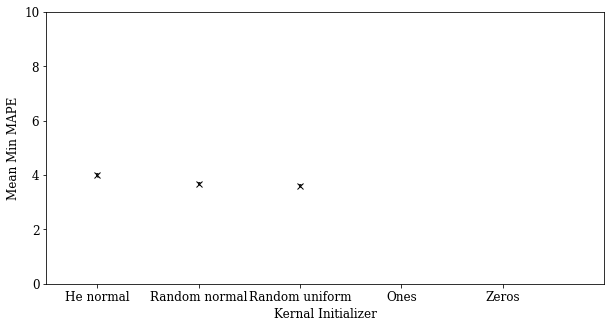

In [24]:
mean_min_mape = np.mean(min_mape,axis = 1)
print(min_mape[0,:])
ste = np.std(min_mape,axis = 1)
print(ste)
fig = plt.figure(figsize= (10,5))
plt.errorbar(range(5),mean_min_mape,ste, linestyle = '' , marker = 'x',capsize= 0.5,c = 'black')
plt.xticks(range(5),['He normal','Random normal','Random uniform','Ones','Zeros'])
plt.xlim(-0.5,5)
plt.ylim(0,10)
plt.ylabel('Mean Min MAPE')
plt.xlabel('Kernal Initializer')


In [25]:
np.savetxt('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Sean_Working_Notebooks/Testing_Notebooks/norm.csv',min_mape)
fig.savefig('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/kernal_init.png',dpi = 300)